<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2016/16_nlp_with_rnns_and_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Contoh data dummy
train_text = tf.constant([
    "Saya sangat senang dengan produk ini",
    "Layanan buruk dan pengiriman lambat",
    "Kualitas bagus, sangat direkomendasikan",
    "Tidak puas, mengecewakan",
])
train_labels = tf.constant([1, 0, 1, 0])  # 1 = positif, 0 = negatif

# Layer vektorisasi teks
text_vec_layer = keras.layers.TextVectorization(
    max_tokens=10000,
    output_sequence_length=250
)
text_vec_layer.adapt(train_text)  # Bangun vocab dari data training

# Layer embedding
embedding_layer = keras.layers.Embedding(input_dim=10000, output_dim=128)

In [7]:
# Model sentimen analisis
model = keras.models.Sequential([
    text_vec_layer,
    embedding_layer,
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation="sigmoid")  # Output 1 nilai antara 0 dan 1
])

# Kompilasi
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Training
history = model.fit(train_text, train_labels, epochs=10)

# Prediksi contoh baru
test_text = tf.constant([
    "Produk ini sangat mengecewakan",
    "Saya suka layanan ini"
])
predictions = model.predict(test_text)
print(predictions)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6932
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5000 - loss: 0.6939
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5000 - loss: 0.6933
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5000 - loss: 0.6935
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5000 - loss: 0.6933
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5000 - loss: 0.6933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
[[0.5072348]
 [0.5072348]]


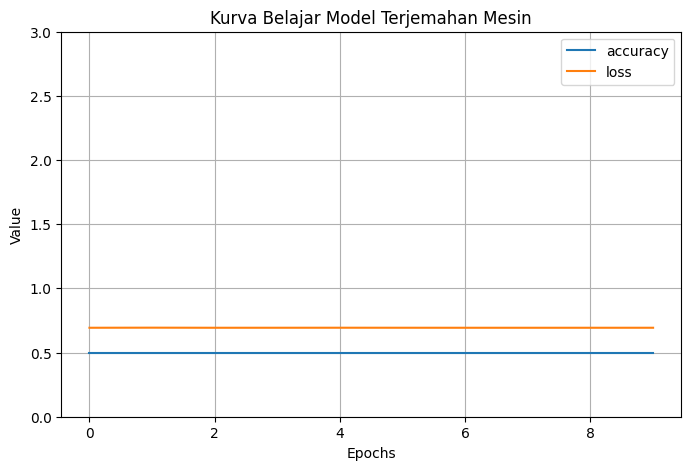

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame dari history pelatihan
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3) # Sesuaikan batas sumbu y jika perlu
plt.title("Kurva Belajar Model Terjemahan Mesin")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.show()

/tmp/ipython-input-9-814254468.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + input_sentence.split(), fontdict=fontdict, rotation=90)
/tmp/ipython-input-9-814254468.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + translation.split(), fontdict=fontdict)


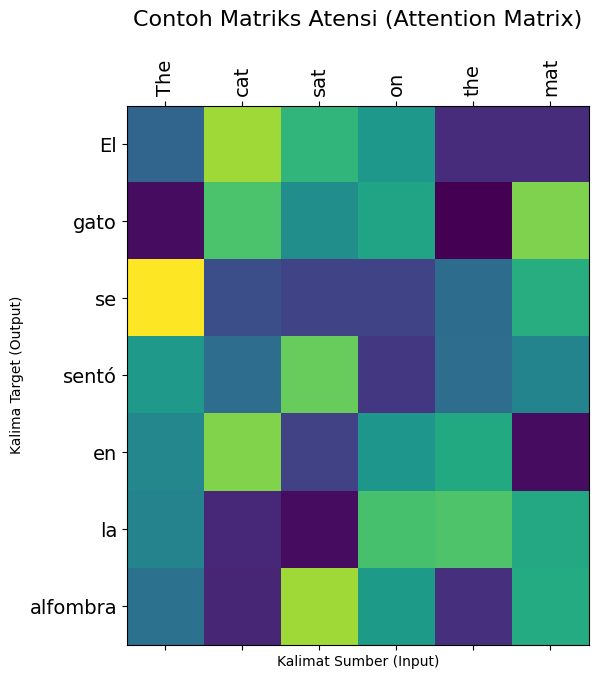

In [9]:
import numpy as np

# Kode untuk visualisasi ini sangat kompleks karena memerlukan
# pembuatan dan pelatihan model Encoder-Decoder dengan Attention dari awal.
# Berikut adalah bagian inti untuk plotting, dengan asumsi
# 'input_sentence', 'translation', dan 'attention_weights' sudah didapatkan
# dari proses prediksi model kustom.

# Contoh data placeholder
input_sentence = "The cat sat on the mat"
translation = "El gato se sentó en la alfombra"
# Bobot atensi (attention weights) adalah matriks dengan shape (panjang_output, panjang_input)
# Nilai acak untuk demonstrasi
np.random.seed(42)
attention_weights = np.random.rand(len(translation.split()), len(input_sentence.split()))
attention_weights /= attention_weights.sum(axis=1, keepdims=True)


# Plotting heatmap dari matriks atensi
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
ax.matshow(attention_weights, cmap='viridis')

fontdict = {'fontsize': 14}

ax.set_xticklabels([''] + input_sentence.split(), fontdict=fontdict, rotation=90)
ax.set_yticklabels([''] + translation.split(), fontdict=fontdict)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

plt.title("Contoh Matriks Atensi (Attention Matrix)\n", fontsize=16)
plt.xlabel("Kalimat Sumber (Input)")
plt.ylabel("Kalima Target (Output)")
plt.show()